In [50]:
import numpy as np 
import pandas as pd 
import nltk
from nltk.corpus import stopwords
import string
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import seaborn as sns

In [11]:
df=pd.read_csv("C:/Users/Aishwik/Documents/F_R/Project_2/Project_2/email_messages.csv/messages.csv")

In [12]:
df.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [13]:
df.shape

(2893, 3)

In [14]:
df.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [15]:
df=df.fillna("No subject")

In [16]:
df.isnull().sum()

subject    0
message    0
label      0
dtype: int64

In [19]:
nltk.download('stopwords')
def process_text(text):
    
    #1 Remove Punctuationa
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    #2 Remove Stop Words
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    
    #3 Return a list of clean words
    return clean_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aishwik\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [25]:
df['message'].apply(process_text)

0       [content, length, 3386, appleiss, research, ce...
1       [lang, classification, grimes, joseph, e, barb...
2       [posting, inquiry, sergei, atamas, satamas, um...
3       [colleague, researching, differing, degrees, r...
4       [earlier, morning, phone, friend, mine, living...
                              ...                        
2888    [hello, thanks, stopping, taken, many, new, pi...
2889    [list, owner, kiddin, invited, join, mailing, ...
2890    [judging, return, post, must, sounded, like, k...
2891    [gotcha, two, separate, fallacies, argument, n...
2892    [hello, working, thesis, concerning, attitudes...
Name: message, Length: 2893, dtype: object

In [27]:
messages_bow = CountVectorizer(analyzer=process_text).fit_transform(df['message'])

In [31]:
#Split data into 80% training & 20% testing data sets
X_train, X_test, y_train, y_test = train_test_split(messages_bow, df['label'], test_size = 0.20, random_state = 0)

In [32]:
messages_bow.shape

(2893, 64661)

In [33]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [34]:
#Print the predictions
print(classifier.predict(X_train))

#Print the actual values
print(y_train.values)

[1 0 1 ... 0 0 0]
[1 0 1 ... 0 0 0]


In [67]:
#Evaluate the model on the training data set
pred_train = classifier.predict(X_train)
print(classification_report(y_train ,pred_train ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred_train))
print()
print('Accuracy: ', accuracy_score(y_train,pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1938
           1       0.98      0.99      0.99       376

    accuracy                           1.00      2314
   macro avg       0.99      1.00      0.99      2314
weighted avg       1.00      1.00      1.00      2314

Confusion Matrix: 
 [[1931    7]
 [   2  374]]

Accuracy:  0.9961106309420916


In [36]:
print('Predicted value: ',classifier.predict(X_test))

print('Actual value: ',y_test.values)

Predicted value:  [0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       474
           1       0.95      1.00      0.97       105

    accuracy                           0.99       579
   macro avg       0.97      0.99      0.98       579
weighted avg       0.99      0.99      0.99       579

Confusion Matrix: 
 [[468   6]
 [  0 105]]


Accuracy:  0.9896373056994818


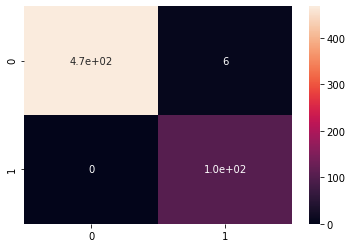

In [68]:
#Evaluate the model on the test data set
pred_test = classifier.predict(X_test)
print(classification_report(y_test ,pred_test ))
print('Confusion Matrix: \n', confusion_matrix(y_test,pred_test))
print()
sns.heatmap(confusion_matrix(y_test,pred_test),annot=True)
print()
print('Accuracy: ', accuracy_score(y_test,pred_test))

In [73]:
r2_score = sklearn.metrics.r2_score(y_train, pred_train)
print('r2_score on train data = {}'.format(r2_score))

r2_score = sklearn.metrics.r2_score(y_test, pred_test)
print('r2_score on test data= {}'.format(r2_score))

r2_score on train data = 0.9714198669389368
r2_score on test data= 0.9301989150090416


In [74]:
MSE_train = sklearn.metrics.mean_squared_error(y_train, pred_train)
print('MSE on train set ={}'.format(MSE_train))

MSE_test = sklearn.metrics.mean_squared_error(y_test, pred_test)
print('MSE on test set = {}'. format(MSE_test))

MSE on train set =0.0038893690579083835
MSE on test set = 0.010362694300518135
